Importing the Dependencies

In [1]:
import numpy as np # add array
import pandas as pd # data frame
import matplotlib.pyplot as plt #use for making plot
import seaborn as sns #use for making plot
from sklearn.cluster import KMeans # This is K Means Clustering Algo take from sklearn.cluster library

data Collection & Analysis

In [2]:
# loading the data from csv file to a pandas DataFrame

customer_data = pd.read_csv('/content/Mall_Customers.csv')

In [4]:
# Print first 5 rows in the DataFrame
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
#finding the Number of rows and colums
customer_data.shape

(200, 5)

In [7]:
# Getting some information about the dataset
customer_data.info() #null values means missig value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [8]:
# checking for missing values
customer_data.isnull().sum() # give number of missing values in each column

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


Choosing the Anual Income Column & Spending Score Column

In [10]:
X = customer_data.iloc[:,[3,4]].values  # iloc is use for located the specific columns # here we use slicing ':' its use for takeing the coloumns otherwise the rows will be selected and take 3 and 4 coloumn # .values for taking values

In [12]:
print(X)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

Choosing the number of Clusters

Ussing Parameter :
1. WCSS ---> Within Cluster Sum of Squares

In [15]:
# Finding WCSS value for Diffrent number of cluster

wcss = []

for i in range(1,11):  # taking values from 1 to 10 (n-1) order
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42) #add KMeans function in kmeans # number of clusters is i #init means initiation kmeans clustering #random_state = 42 means data taking random value as 42 splitting data .
  # kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, random_state=42)  ##if uppur code line gives warning use this and set n_init explicity
  ##The warnings are just to inform you of an upcoming change in scikit-learn's default behavior. Setting n_init explicitly will prevent the warnings and ensure that your code behaves consistently across different versions of the library.
  kmeans.fit(X) #fitting the data
  wcss.append(kmeans.inertia_) #appending the wcss value # inertia_ method of kMeans class calculates wcss for that model and give wcss value for each clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

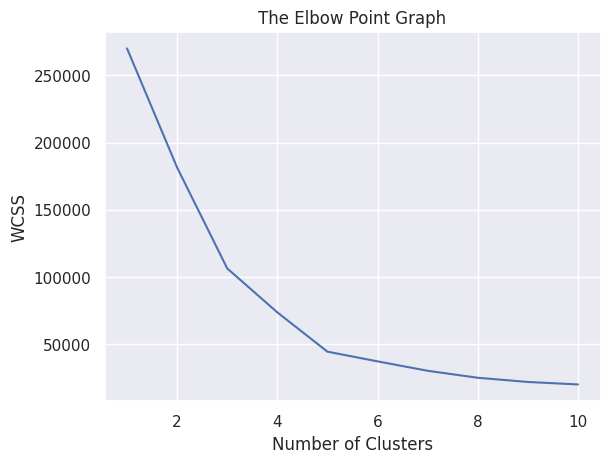

In [17]:
# plot an elbow graph

sns.set() #gives basic parameter for the graph
plt.plot(range(1,11), wcss) #plotting the range as same as the wcss
plt.title('The Elbow Point Graph') #Titile the graph
plt.xlabel('Number of Clusters') #x label
plt.ylabel('WCSS') #y label
plt.show() #show the graph

# there are two down points which are called Elbow points

Optimum Number of Clusters = 5


*   because after this points there is no sharp significance Drop So We can Choose our Clusters From This



Training The K-Means Clustering Model and here The value of k is 5.

In [18]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0) #add KMeans function in kmeans # number of clusters is 5 #init means initiation kmeans clustering #random_state = 0 means data taking random value as 0 splitting data .

#Return a label for each data point based on there structure
Y = kmeans.fit_predict(X) # fit_predict will return the cluster no for each of this datapoints
print(Y)

[3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3
 4 3 4 3 4 3 0 3 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 0 1 2 1 2 1 0 1 2 1 2 1 2 1 2 1 0 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


5 Clusters ---> 0, 1, 2, 3, 4

Vizualizing all the Clusters

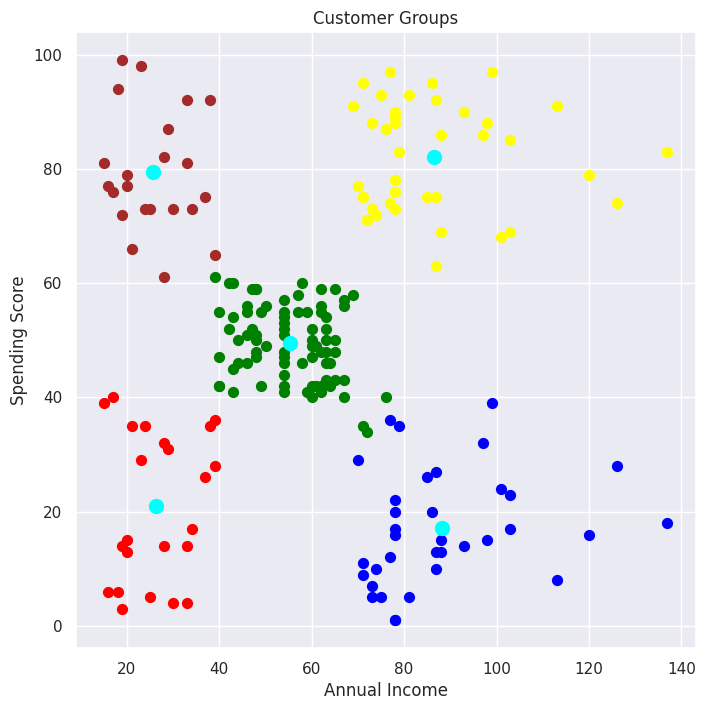

In [20]:
# Plotting all the Clusters and Their Centriods(representation points of each Clusters)

plt.figure(figsize=(8,8)) #set the figure size
plt.scatter(X[Y==0,0], X[Y==0,1], s=50, c='green', label='Cluster 1')
plt.scatter(X[Y==1,0], X[Y==1,1], s=50, c='yellow', label='Cluster 2')
plt.scatter(X[Y==2,0], X[Y==2,1], s=50, c='blue', label='Cluster 3')
plt.scatter(X[Y==3,0], X[Y==3,1], s=50, c='red', label='Cluster 4')
plt.scatter(X[Y==4,0], X[Y==4,1], s=50, c='brown', label='Cluster 5')

# Y represented the cluster value coressponding to X
# s represents size of the dots for scatterplot
# c represents the colour of the dots
# X[Y==0,0] X coordinate of this Cluster 1 --> X[Y==0,0] first 0 means all the values of cluster 0... Second 0 represents the first column of the sheet in 10no. line code output Which is Annual Income.
# X[Y==0,1] Y coordinate of this Cluster 1 --> X[Y==0,1] 1 represents the second column of the sheet in 10no. line code output which is Speding Scores... first 0 means all the values of cluster 0

#plotting the centroids of the clusters :
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='cyan', label='Centroids')

# 0 represents the centroid of X-axis and 1 represents the centroid of Y-axis

plt.title('Customer Groups') #title the graph
plt.xlabel('Annual Income') # x label
plt.ylabel('Spending Score') # y label
plt.show() #print the graph
